In [3]:
#Imports

import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



In [4]:
####################################################
def targ_pdf(xi): #The Target Distribution
    p = stat.norm.pdf(xi,3,1) + stat.norm.pdf(xi,-5,2)
    return p

def enve_pdf(x):# The envelope 'wrapper' Distribution
    p1 = stat.norm.pdf(x,0,4)
    return p1

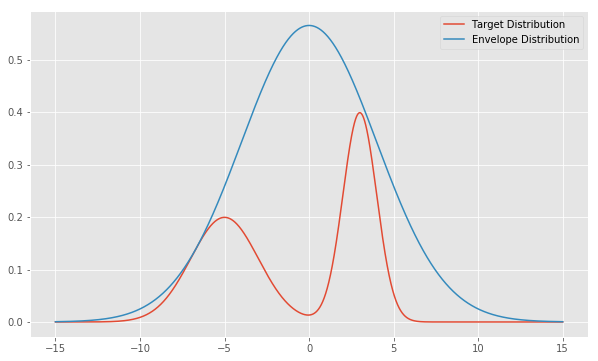

In [10]:
x = np.arange(-15,15,0.001)
y = targ_pdf(x)

y_env = enve_pdf(x)  #The envelope distribution
c = max(y/y_env)

plt.figure(figsize=(10,6))
plt.plot(x,y,label='Target Distribution')
plt.plot(x,c*y_env,label='Envelope Distribution')
plt.legend(loc='upper right')

# Rejection sampling

- Init sample number i $\leftarrow$ 0
- while i < Nsamples do
-  $x_{i}$ ~ q(x) (Sample from wrapper distribuion)
-  u ~ Uniform(0,1) # Sample from uniform ditribution
    - Acceptance Probability
      -  $\alpha$ = $\frac{P(x_{i})}{C*q(x_{i})}$
    - if u<$\alpha$
         - Accept: $x_{i}$
    - else
         - Reject:$x_{i}$

In [5]:
# Using Rejection Sampling
sample_num = 0
sample = []
N = 1000
while (sample_num < N ):
    x_i = np.random.normal(0,4,1)[0]  #Random sample from symmetric distribution (Gaussian: mean=0,sigma=4)
    u_i = np.random.uniform(0,1,1)  #Random sample from uniform distribution (0,1)
    
    #The Accepetance Criteria
    if (u_i < (targ_pdf(x_i)/c*enve_pdf(x_i)) ):
        sample.append(x_i)
        sample_num +=1

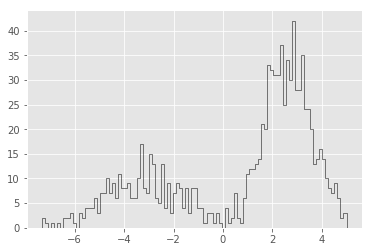

In [6]:
plt.hist(sample,bins=100,histtype='step',color='black')
plt.show()

# Metropolis - Hasting

## Pseudo code

- Guess random sample $x_{0}$ 
- For i=1,2,3... do
    -  Propose: $x_{candidate}$ ~ q($x_{i-1}$) # From Proposal distribution
    - Acceptance Probability 
        - $\alpha$ = min{1,$\frac{P(x_{candidate}) q(x_{i-1})}{P(x_{i-1}) q(x_{candidate})}$}
        - u~ Uniform(0,1)
    - If u<$\alpha$ then
        - Accept: $x_{i} \leftarrow x_{candidate}$
    - else
        - Reject: $x_{i} \leftarrow x_{i-1} $

In [11]:
# Guess sample
x = 10.0

#------------
N=1000
samples_mh = np.zeros(N+1)
samples_mh[0] = x
sigma = 4

#--------------------

for i in range(N):
    x_cand = x + stat.norm(0,sigma).rvs() #Candidate sample
    #Acceptance Probability
    frac = (targ_pdf(x_cand)/targ_pdf(x))  #since q(x) is symmetric (Proposal distribution) q(xi)/q(xi-1) = 1
    alpha = min(1,frac)
    u = np.random.uniform(0,1)
    
    #print(sara)
    
    if u <= alpha : #Accept
        x = x_cand
    
    samples_mh[i] = x

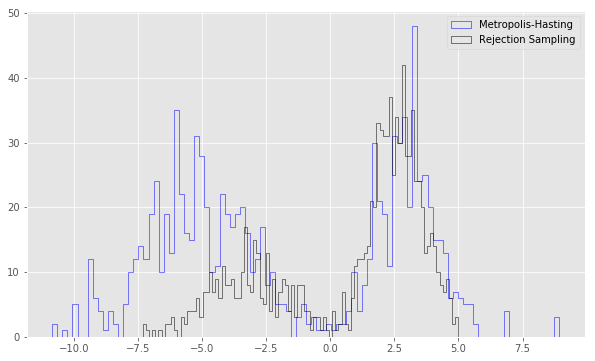

In [12]:
plt.figure(figsize=(10,6))
plt.hist(samples_mh,bins=100,histtype='step',color='blue',label='Metropolis-Hasting')
plt.hist(sample,bins=100,histtype='step',color='black',label='Rejection Sampling')
plt.legend()
plt.show()

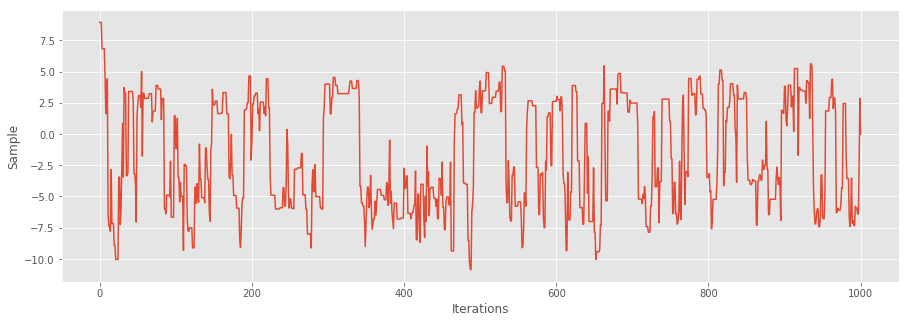

In [13]:
plt.figure(figsize=(15,5))
plt.plot(samples_mh,'-')
plt.xlabel('Iterations')
plt.ylabel('Sample')
plt.legend()